<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-15 16:41:13--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 172.217.193.113, 172.217.193.139, 172.217.193.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-1k-docs.googleusercontent.com/docs/securesc/iv9fma9cjgcrraruh3a2bqkbtbquf1ep/4khh3nos6dohce1mgj79i7hbsnid7i9o/1589560800000/11146100322577758036/15620319708502851168Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-15 16:41:13--  https://doc-0g-1k-docs.googleusercontent.com/docs/securesc/iv9fma9cjgcrraruh3a2bqkbtbquf1ep/4khh3nos6dohce1mgj79i7hbsnid7i9o/1589560800000/11146100322577758036/15620319708502851168Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0g-1k-docs.googleusercontent.com (doc-0g-1k-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connectin

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import pandas as pd
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin
from sklearn.metrics import accuracy_score,confusion_matrix,jaccard_score

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

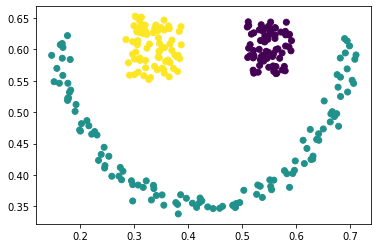

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:1.5095760822296143sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


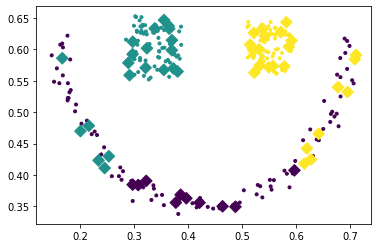

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:1.8694777488708496sg
Ari: 1.0 y accuracy: 1.0


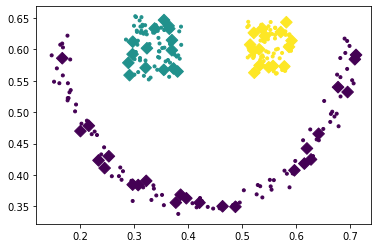

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0721418857574463sg
Ari: 1.0 y accuracy: 1.0


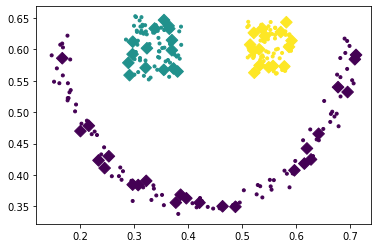

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',gamma_=500,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:1.0941736698150635sg
Ari: 1.0 y accuracy: 1.0


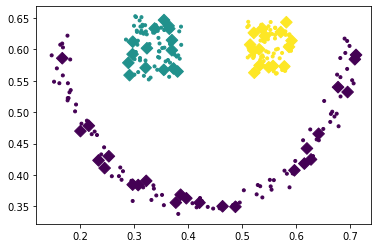

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.003,optimization='Adam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:1.091156005859375sg
Ari: 1.0 y accuracy: 1.0


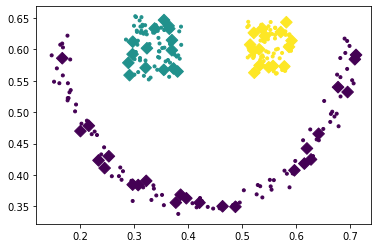

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.04242753982543945sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


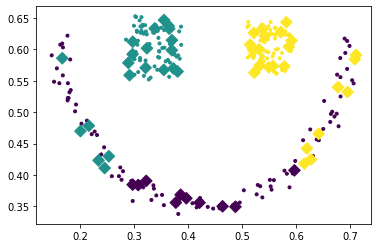

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.059571266174316406sg
Ari: 1.0 y accuracy: 1.0


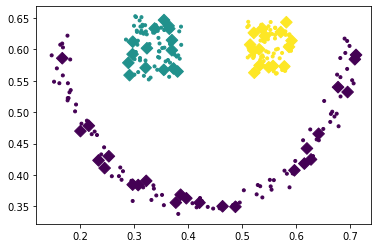

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

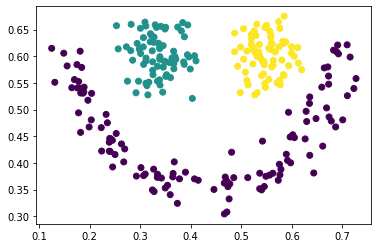

In [0]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:3.5322482585906982sg
Ari: 0.6310246340592645 y accuracy: 0.8703703703703703


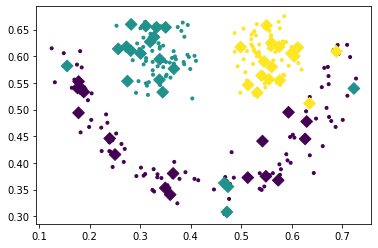

In [0]:
t = time.time()
p = PRI(lambda_=3, n_clusters=3, nn=5, sigma_initial=2,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0158705711364746sg
Ari: 0.4867636947054779 y accuracy: 0.7592592592592593


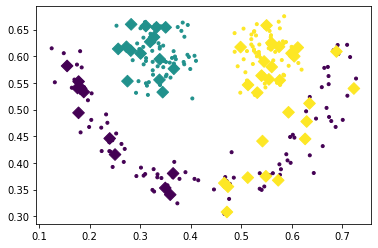

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',n_clusters=3,gamma_=500,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.061058998107910156sg
Ari: 0.5793650793650794 y accuracy: 0.8333333333333334


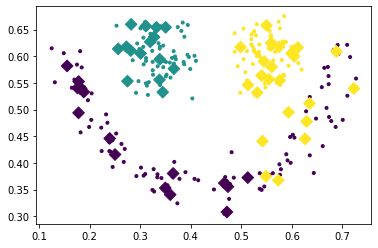

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

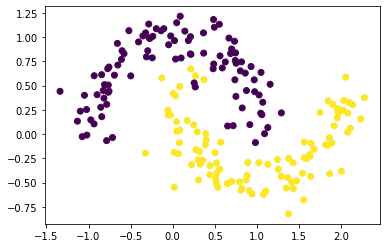

In [0]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =12
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8858356475830078sg
Ari: 0.47712933753943215 y accuracy: 0.85


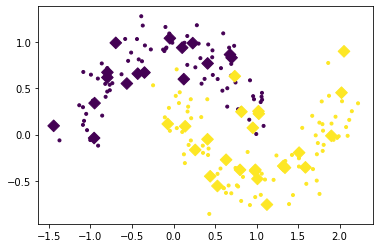

In [0]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.6042680740356445sg
Ari: 0.5517241379310345 y accuracy: 0.875


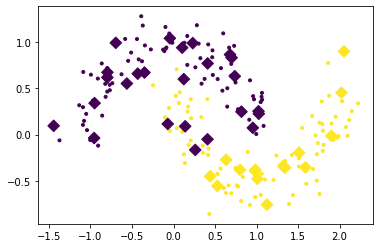

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=40,learning_rate=0.03,reduction_='SC',n_clusters=2)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.1457967758178711sg
Ari: 0.10931095061487414 y accuracy: 0.675


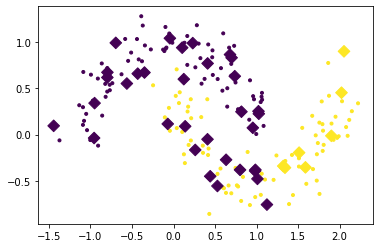

In [0]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[3,15,30],'rep__sigma_initial':[35],'rep__learning_rate':[0.001,0.003],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]

for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   12.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   12.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   12.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 38.88888888888889
ari: 3.9511115793910006
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 38.88888888888889
ari: 0.10951008645533403
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 37.03703703703704
ari: 0.14797199101598896
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 50.0
ari: 4.752865770984841
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: -0.1408285412510325
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.8min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 48.148148148148145
ari: 2.044828942194258
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.7min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.0min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.6min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.1min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.3min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.9min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.2min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.6min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 30, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 46.2962962962963
ari: 0.6612753769690815
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.2min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 50.0
ari: 3.9251402885095654
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 55.55555555555556
ari: 7.981893192757281
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 68.51851851851852
ari: 26.59537166900421
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 1.2441771330856752
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.407407407407405
ari: 9.682174656524557
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 62.96296296296296
ari: 19.08160280783855
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 59.25925925925925
ari: 13.684863890284635
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 53.70370370370371
ari: 8.985310200100495
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 50.0
ari: 5.49732254756751
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.407407407407405
ari: 12.494840497670852
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 62.96296296296296
ari: 16.94370929852211
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 11.608791470605755
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 12.82066508313539
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 55.55555555555556
ari: 10.754517718845342
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 64.81481481481481
ari: 20.11928195786938
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 51.85185185185185
ari: 6.401079558789018
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 14.71754496867996
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 12.215647209253918
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 1.1752043517468052
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 18.350234009360374
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.7min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 57.407407407407405
ari: 9.821638113118986
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 53.70370370370371
ari: 9.94612515540821
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 64.81481481481481
ari: 25.27709632607218
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.7min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 59.25925925925925
ari: 22.801906779661017
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.7min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 50.0
ari: 2.933746698817313
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 48.148148148148145
ari: 5.152140278494071
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 55.55555555555556
ari: 15.319548872180452
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 51.85185185185185
ari: 4.8594176925110935
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 53.70370370370371
ari: 6.2444719617901985
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 51.85185185185185
ari: 9.979045975594726
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.18518518518519
ari: 58.55065568408219
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 79.62962962962963
ari: 52.53823341280456
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.18518518518519
ari: 61.20883012631331
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 98.14814814814815
ari: 94.05619171290284
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 90.74074074074075
ari: 73.24821852731591
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 81.48148148148148
ari: 55.04533489324365
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 35.01031400412561
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.09906866057526
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.09906866057526
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 41.09388710149167
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.09906866057526
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 49.31354142220137
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 38.66953538407862
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 43.91534391534392
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 48.2257400105926
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 41.09388710149167
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.18518518518519
ari: 61.20883012631331
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 30, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.22222222222221
ari: 52.46636771300448
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 83.33333333333334
ari: 57.936507936507944
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 79.62962962962963
ari: 47.131389446346354
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.22222222222221
ari: 52.46636771300448
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.7min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 90.74074074074075
ari: 73.24821852731591
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 30, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 87.03703703703704
ari: 64.857024450891
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.7min finished


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 30, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 83.33333333333334
ari: 57.936507936507944
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 15, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.18518518518519
ari: 61.20883012631331
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 30, 'rep__learning_rate': 0.003, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 88.88888888888889
ari: 68.87346502936464


**Moons**


In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,15,30],'rep__sigma_initial':[40],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_
  

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.0s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.7min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 87.5
ari: 55.10163805012828
it 2/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 72.5
ari: 18.156700217090982
it 3/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 80.0
ari: 34.333070244672456
it 4/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 90.0
ari: 63.06235201262825
it 5/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 85.0
ari: 47.71293375394322
it 6/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 90.0
ari: 63.06235201262825
it 7/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  3.0min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 80.0
ari: 34.333070244672456
it 8/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.8min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 77.5
ari: 28.793927099011846
it 9/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.8s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.9min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 85.0
ari: 47.6578947368421
it 10/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.7min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 75.0
ari: 23.529411764705884
it 1/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.2min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.4min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.4min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 87.5
ari: 55.172413793103445
it 5/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.1min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 72.5
ari: 18.79772860779323
it 7/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 7/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.2min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 72.5
ari: 18.28571428571428
it 1/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.2min finished


it 4/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.2min finished


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 90.0
ari: 63.05263157894737
it 7/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.2min finished


it 7/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 75.0
ari: 23.529411764705884
it 8/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.2s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.3min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 65.0
ari: 7.794232268121577
it 9/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.4min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  2.5min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 15, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 62.5
ari: 5.186385737439232


In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar Resultados**
1. **Happy**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/happy'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

**Accuracy**

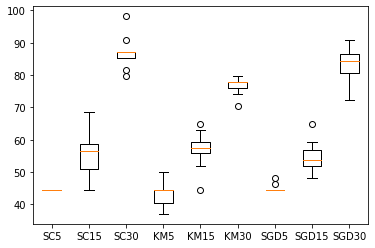

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

**ARI**

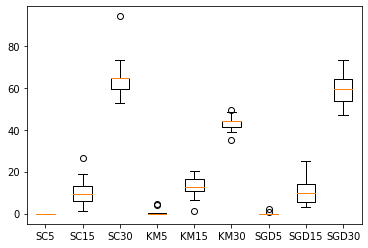

In [0]:
plt.boxplot(Rari,labels=meth2)
plt.show()

2. **Moons**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/moons'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

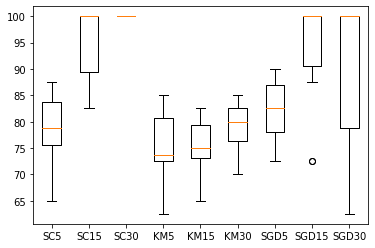

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

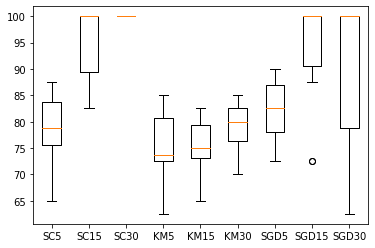

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

### **Parte 2. Real dataset**

In [0]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
sonar=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
ecoli=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data')
liver=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data')
ionosphere=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')

**Iris**

**Pre procesamiento de la base de datos**

In [0]:
iris,labels_iris=pre_process(iris)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris, labels_iris, test_size=0.2, stratify=labels_iris)

In [18]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=35,learning_rate=0.05,reduction_='SC',n_clusters=3,gamma_=10,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.366405725479126sg
Ari: 0.5538461538461539 y accuracy: 0.6666666666666666
Jacc: 0.5 y Purity: 0.6666666666666666


**Sonar**

**Pre procesamiento de la base de datos**

In [0]:
sonar,labels_sonar=pre_process(iris)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    sonar, labels_sonar, test_size=0.2, stratify=labels_sonar)

In [59]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=35,learning_rate=0.05,reduction_='SC',n_clusters=2,gamma_=10,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD)
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.6525893211364746sg
Ari: 0.16438415252226804 y accuracy: 0.7142857142857143
Jacc: 0.5 y Purity: 0.7142857142857143
